In [1]:
import numpy as np

# set problem size
N = 5
#Tau = 1
E = np.random.normal(0, scale=N/2, size=2**N)
idx_min = np.argmin(E)

print(E)

# B(t): arbitary function
def scheduleE(time):
    return time/Tau

# A(t): arbitary function
def scheduleG(time):
    return (Tau - time)/Tau

# generate differential equation
def generate_diffeq(idx, offdiag_indices, time, vec):
    v = E[idx]*scheduleE(time)
    g = -1*scheduleG(time)
    return v*vec[idx] + g*np.sum(vec[offdiag_indices])

diffeq_array = [lambda vec, t, _i=i, _ij=np.array([i ^ (1 << n) for n in range(N)]):
               generate_diffeq(_i, _ij, t, vec) for i in range(2**N)]

def simdiffeq_rhs(t, vec):
    return np.array([-1j*f(vec, t) for f in diffeq_array], dtype=np.complex_)

[ 0.78788065 -1.41024972  2.70693274 -0.29360192 -0.53131859  2.46220532
  0.80950015 -1.30104628  1.01967858  1.5880319  -0.2967759   0.88375118
 -1.21995075 -2.18766658  0.6488387   2.47365149  2.21807785  0.5604765
  1.61499772 -1.55602478  1.11772805  2.6643443  -0.6139178   0.04673462
 -0.65931683 -6.44307252  0.14374199 -0.50380879  0.41617738  2.97736788
 -0.00801807 -4.44154465]


In [2]:
from scipy.integrate import complex_ode

vec0 = np.array([2**(-N/2)] * 2**N, dtype=np.complex_)
result_tau = []
Taus = [1 / 4, 1 / 2, 1, 2, 3, 4, 6, 8, 12, 16, 24, 32, 48, 64, 96, 128, 192, 256, 384, 512, 768, 1024, 1536, 2048, 3072, 4096]
for Tau in Taus:
    r = complex_ode(simdiffeq_rhs)
    r.set_initial_value(vec0)

    steps = 100
    i = 0
    t = 0
    while r.successful() and i <= steps:
        v = r.integrate(t) if t != 0 else vec0
    
        t += Tau/steps
        i += 1
    
    #print(Tau, abs(v[idx_min])**2)
    result_tau.append(abs(v[idx_min])**2)

/usr/local/lib/python3.8/site-packages/scipy/integrate/_ode.py:1011: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


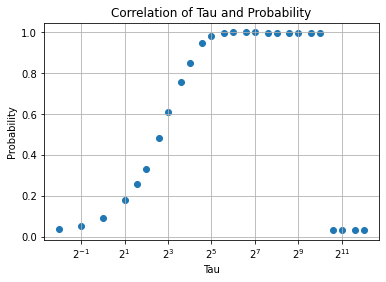

In [3]:
import matplotlib.pyplot as plt

Taus_str = [str(Tau) for Tau in Taus]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(Taus, result_tau)
ax.set_title('Correlation of Tau and Probability')
ax.set_xlabel('Tau')
ax.set_ylabel('Probability')
ax.set_xscale('log', base=2)
ax.grid()

fig.savefig('CorrelationOfTauAndProbability.png')
plt.show()